# Title

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
import matplotlib.style as style
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(style='darkgrid', context='notebook', palette='husl') 

print("It's working.")

It's working.


# Import and Read

In [2]:
df = pd.read_csv('Expenses.csv')
#index_col are ROW labels
#check all read_csv subarguments

#break the dataset into separate files, with one for each column
    #transport_events = "../input/iris_setosa.csv"
    #iris_ver_filepath = "../input/iris_versicolor.csv"
    #iris_vir_filepath = "../input/iris_virginica.csv"
    # Read the files into variables 
    #iris_set_data = pd.read_csv(iris_set_filepath, index_col="Id")
    #iris_ver_data = pd.read_csv(iris_ver_filepath, index_col="Id")
    #iris_vir_data = pd.read_csv(iris_vir_filepath, index_col="Id")
    #then kdeplot(shade=), distplot(kde=)

df.head()
#df.shape
#df.info()

,SCHOOL YEAR,SEMESTER,EXPENSE NAME,TYPE,AMOUNT,NOTES,Unnamed: 6
0,2019-2020,Fall,Venues,Event,350.00,NaN,NaN
1,2019-2020,Fall,Transport,Event,2744.34,NaN,NaN
2,2019-2020,Fall,Accomodation,Event,614.91,NaN,NaN
3,2019-2020,Fall,Marketing,Event,279.90,NaN,NaN
4,2019-2020,Fall,Other,Event,138.43,NaN,NaN


# Clean/Update Data
Delete columns and Change the data type of some of the variables

In [3]:
#empty and can be dropped
del df['Unnamed: 6']
#categories
expensive = df[(df['AMOUNT'] > 2000)]
cheap = df[(df['AMOUNT'] > 1)  & (df['AMOUNT'] < 1000)]
nineteentwenty = df[(df['SCHOOL YEAR'] ==  '2019-2020')]
eightnine = df[(df['SCHOOL YEAR'] ==  '2018-2019')]
seveneight = df[(df['SCHOOL YEAR'] ==  '2017-2018')]
seveneight.head(10)
df.head(20)

,SCHOOL YEAR,SEMESTER,EXPENSE NAME,TYPE,AMOUNT,NOTES
0,2019-2020,Fall,Venues,Event,350.00,NaN
1,2019-2020,Fall,Transport,Event,2744.34,NaN
2,2019-2020,Fall,Accomodation,Event,614.91,NaN
3,2019-2020,Fall,Marketing,Event,279.90,NaN
4,2019-2020,Fall,Other,Event,138.43,NaN
5,2019-2020,Spring,Venues,Event,0.00,NaN
6,2019-2020,Spring,Transport,Event,198.57,NaN
7,2019-2020,Spring,Accomodation,Event,1820.17,NaN
8,2019-2020,Spring,Marketing,Event,59.93,NaN
9,2019-2020,Spring,Other,Event,0.00,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SCHOOL YEAR   48 non-null     object 
 1   SEMESTER      48 non-null     object 
 2   EXPENSE NAME  48 non-null     object 
 3   TYPE          48 non-null     object 
 4   AMOUNT        48 non-null     float64
 5   NOTES         24 non-null     object 
dtypes: float64(1), object(5)
memory usage: 3.0+ KB


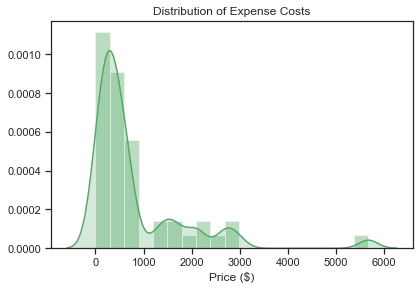

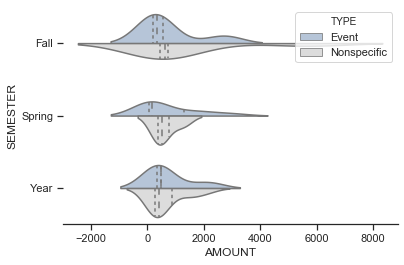

In [24]:
#distplot
sns.despine(left=True)
sns.distplot(df['AMOUNT'], color="g", kde_kws={"shade": True}, axlabel='Price ($)')
plt.tight_layout()
plt.title('Distribution of Expense Costs')
plt.show()
#violinplot
sns.violinplot(x="AMOUNT", y="SEMESTER", hue="TYPE",
               split=True, inner="quart",
               palette={"Event": "lightsteelblue", "Nonspecific": "gainsboro"},
               data=df)
sns.despine(left=True)

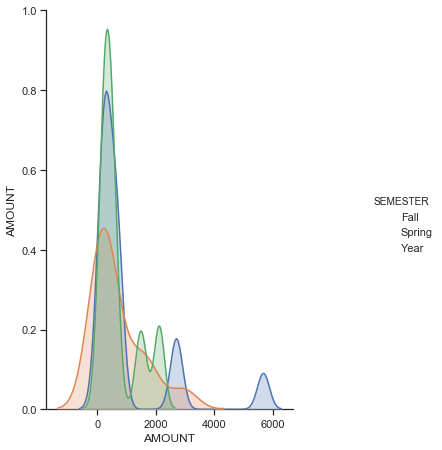

In [6]:
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(df, hue="SEMESTER")
fig.fig.set_size_inches(7,7)

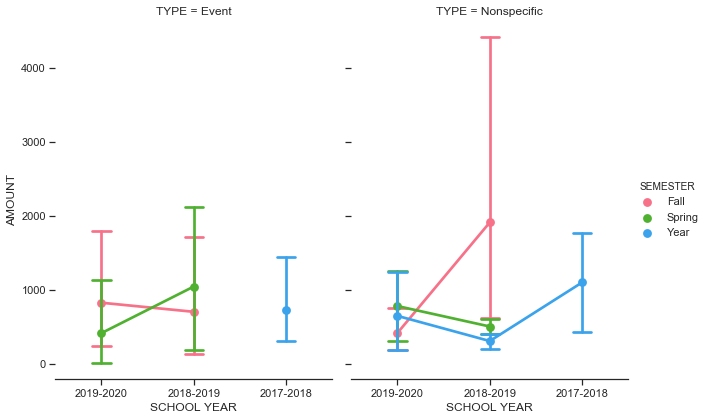

In [29]:
# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.catplot(x="SCHOOL YEAR", y="AMOUNT", hue="SEMESTER", col="TYPE",
                capsize=.2, palette="husl", height=6, aspect=.75,
                kind="point", data=df)
g.despine(left=True)